In [34]:
try:
    import pandas as pd
    print('imported pandas')
except:
    print('pandas has to be installed')

try:
    import sklearn
    from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_classif
    from sklearn.preprocessing import LabelEncoder
    print('imported sklearn')
except:
    print('sklearn has to be installed')

try:
    import matplotlib.pyplot as plt
    print('imported matplotlib')
except:
    print('matplotlib has to be installed')

try:
    import seaborn as sns
    print('imported seaborn')
except:
    print('seaborn has to be installed')

imported pandas
imported sklearn
imported matplotlib
imported seaborn


In [35]:
df = pd.read_csv('games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [36]:
df['total_rating_diff'] = abs(df['white_rating'] - df['black_rating'])
df['opening_move_count'] = df['opening_ply']

df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,total_rating_diff,opening_move_count
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,4,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,15,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,5


In [37]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


X = df.drop('victory_status', axis=1)
y = df['victory_status']

In [38]:
f_selector = SelectKBest(score_func=f_regression, k=5)
f_selector.fit(X, y)
f_scores = f_selector.scores_
f_feature_names = X.columns[f_selector.get_support()]

In [39]:
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
chi2_feature_names = X.columns[chi2_selector.get_support()]

In [40]:
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=5)
mutual_info_selector.fit(X, y)
mi_scores = mutual_info_selector.scores_
mi_feature_names = X.columns[mutual_info_selector.get_support()]

In [41]:
result = pd.DataFrame({'F-Scores': f_scores, 'Chi2-Scores': chi2_scores, 'MI-Scores': mi_scores}, index=X.columns)
result['F-Rank'] = result['F-Scores'].rank(ascending=False)
result['Chi2-Rank'] = result['Chi2-Scores'].rank(ascending=False)
result['MI-Rank'] = result['MI-Scores'].rank(ascending=False)

top_5_f = result.sort_values('F-Rank').head(5)['F-Rank']
top_5_chi2 = result.sort_values('Chi2-Rank').head(5)['Chi2-Rank']
top_5_mi = result.sort_values('MI-Rank').head(5)['MI-Rank']

print("Top 5 predictive features using F-regression:")
print(result.loc[top_5_f.index, ['F-Scores', 'F-Rank']])

print("\nTop 5 predictive features using Chi-square:")
print(result.loc[top_5_chi2.index, ['Chi2-Scores', 'Chi2-Rank']])

print("\nTop 5 predictive features using Mutual information:")
print(result.loc[top_5_mi.index, ['MI-Scores', 'MI-Rank']])

Top 5 predictive features using F-regression:
                      F-Scores  F-Rank
turns               968.312416     1.0
white_rating        249.519052     2.0
black_rating        244.270419     3.0
opening_ply          81.994132     4.0
opening_move_count   81.994132     5.0

Top 5 predictive features using Chi-square:
               Chi2-Scores  Chi2-Rank
created_at    1.814762e+10        1.0
last_move_at  1.814705e+10        2.0
moves         8.613652e+04        3.0
white_id      2.841226e+04        4.0
white_rating  2.695533e+04        5.0

Top 5 predictive features using Mutual information:
              MI-Scores  MI-Rank
winner         0.177607      1.0
created_at     0.061607      2.0
last_move_at   0.061247      3.0
black_id       0.059929      4.0
white_id       0.055409      5.0


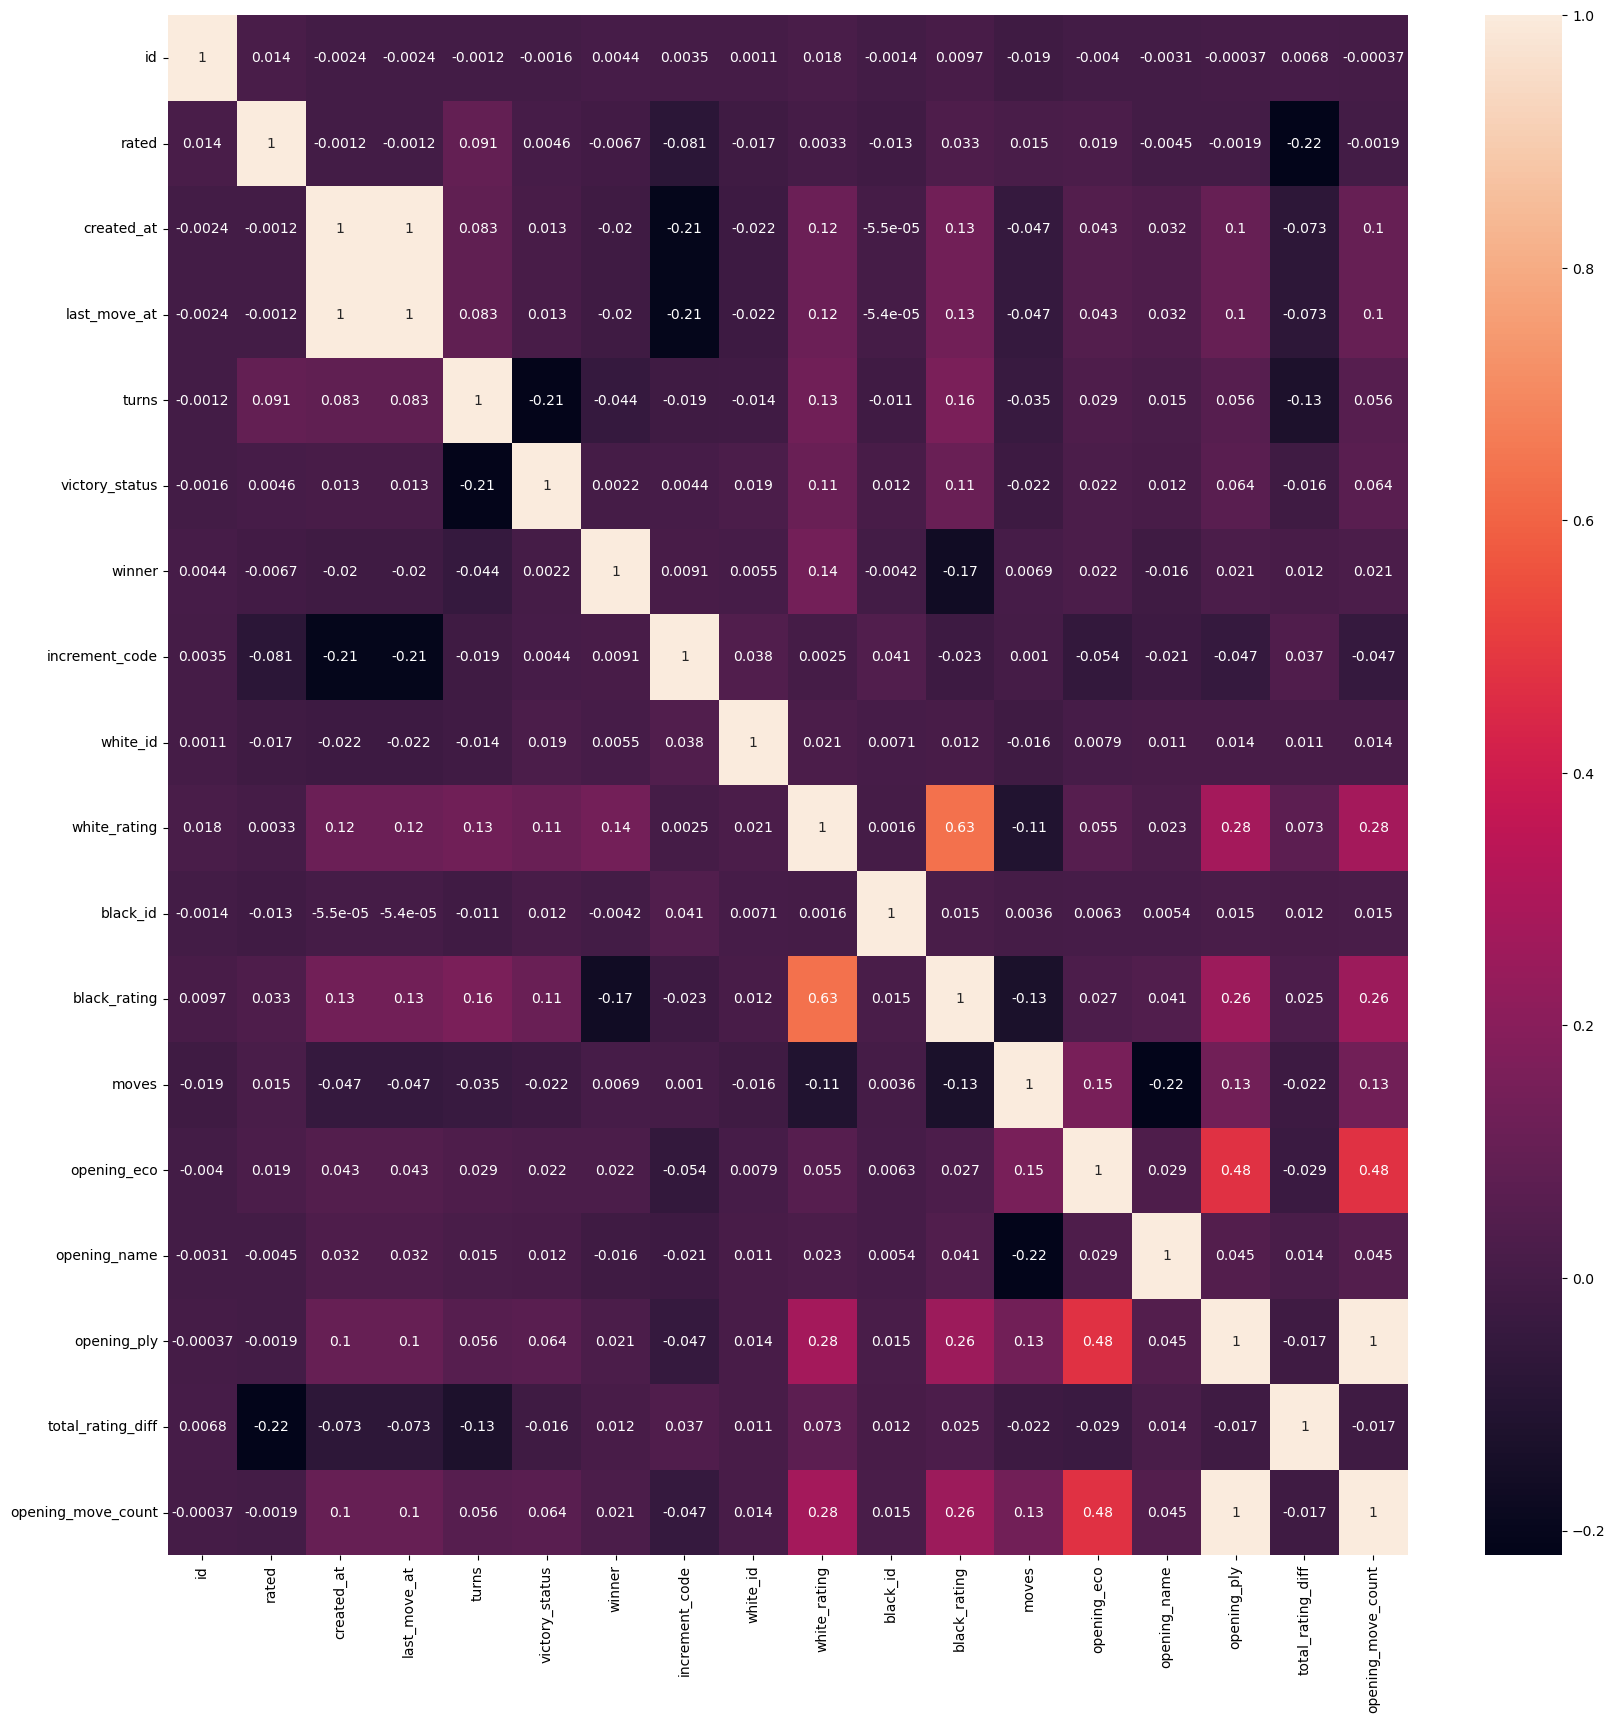

In [42]:
corr = df.corr()
corr_cols = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[corr_cols].corr(),annot=True)